# House Price Prediction--- Feature Engineering

In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [438]:
dataset=pd.read_csv('House_Price_train.csv')
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [439]:
dataset.shape

(1460, 81)

In [440]:
#Handling NaN values for categorical Features
df=dataset.copy()

In [441]:
categorical_feature=[feature for feature in dataset.columns if df[feature].isnull().sum()>0 and df[feature].dtype == 'O']

In [442]:
for feature in categorical_feature:
    print(f'{feature} has {np.round(df[feature].isnull().mean(),4)} % Missing Values')

Alley has 0.9377 % Missing Values
MasVnrType has 0.0055 % Missing Values
BsmtQual has 0.0253 % Missing Values
BsmtCond has 0.0253 % Missing Values
BsmtExposure has 0.026 % Missing Values
BsmtFinType1 has 0.0253 % Missing Values
BsmtFinType2 has 0.026 % Missing Values
Electrical has 0.0007 % Missing Values
FireplaceQu has 0.4726 % Missing Values
GarageType has 0.0555 % Missing Values
GarageFinish has 0.0555 % Missing Values
GarageQual has 0.0555 % Missing Values
GarageCond has 0.0555 % Missing Values
PoolQC has 0.9952 % Missing Values
Fence has 0.8075 % Missing Values
MiscFeature has 0.963 % Missing Values


In [443]:
#Calling Our Creating function to replace NaN values
for feature in categorical_feature:
    df[feature].fillna('Missing',inplace=True)

In [444]:
df[categorical_feature].isnull().sum()
#All the NaN values is replaced

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [348]:
df.isnull().sum()
#Numerical Missing values is still present

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [349]:
yr_feature=[feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]

In [351]:
# Now Same we will do for numerical Values
nan_numerical_feature = [feature for feature in df.columns if df[feature].dtype !='O' and df[feature].isnull().sum()>0 and 'yr' not in feature and 'Year' not in feature and 'Id' not in feature]
numerical_feature = [feature for feature in df.columns if df[feature].dtype !='O' and 'yr' not in feature and 'Year' not in feature and 'Id' not in feature]
numerical_feature,nan_numerical_feature

(['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [352]:
for feature in nan_numerical_feature:
    print(f'{feature} has {np.round(df[feature].isnull().mean(),4)} % Missing Values')

LotFrontage has 0.1774 % Missing Values
MasVnrArea has 0.0055 % Missing Values
GarageYrBlt has 0.0555 % Missing Values


In [353]:
##Getting NaN value columns from num_fe

In [354]:
df[nan_numerical_feature].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [355]:
for feature in nan_numerical_feature:
    df[feature+'nan']=np.where(df[feature].isnull(),1,0) 
    # we'll fill nan value with some meaningfull value like, mean,mode,median & so on, For our convinance we won't be able to find
    # to know, that this columns had nan value initially after filling it, so for that we create another columns which represent that
    # this column had nan values and later it has filled with some other value. it will be easier to understand code when we look into it
    df[feature].fillna(df[feature].median(),inplace=True)

In [356]:
df[nan_numerical_feature].head(10)
#we have fill the numerical missing values with it's median, and also kept nan colum list to identify column has missing values wiht its 0 //1 values

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
5,85.0,0.0,1993.0
6,75.0,186.0,2004.0
7,69.0,240.0,1973.0
8,51.0,0.0,1931.0
9,50.0,0.0,1939.0


In [357]:
yr_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [358]:
for feature in yr_feature:
    if feature !='YrSold':
        df[feature]=df['YrSold']-df[feature]

In [359]:
df[yr_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [360]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


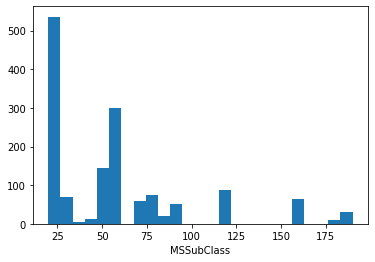

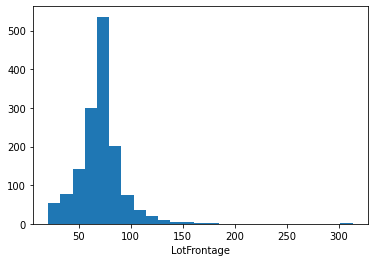

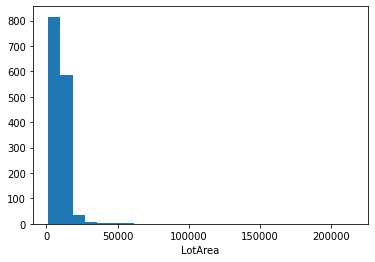

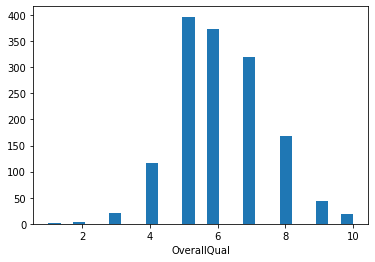

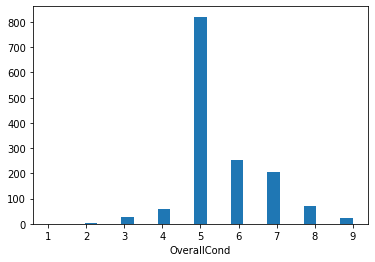

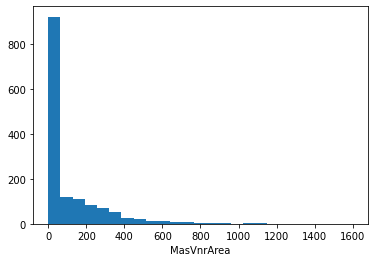

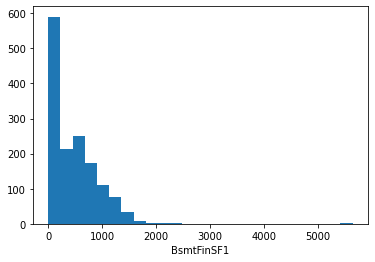

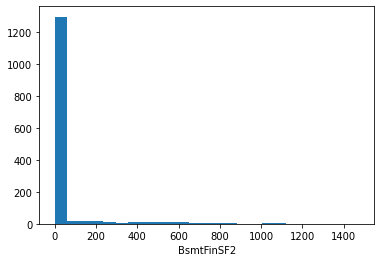

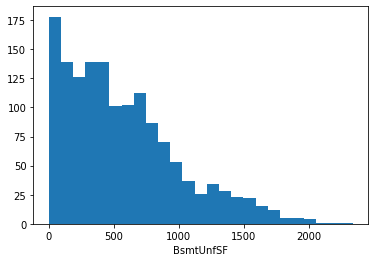

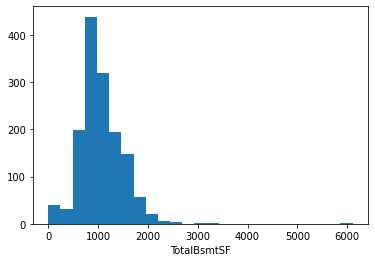

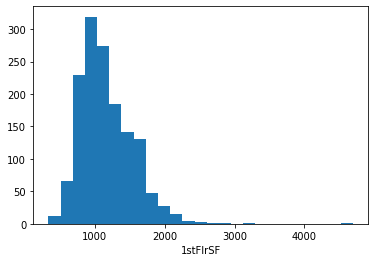

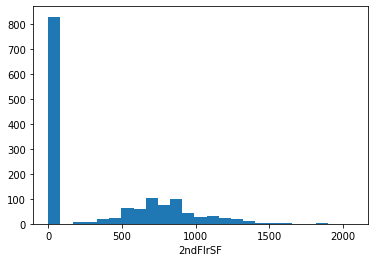

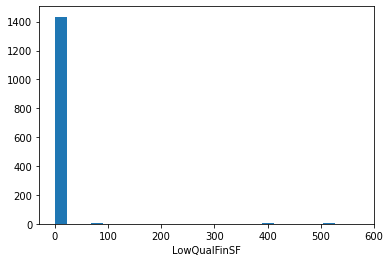

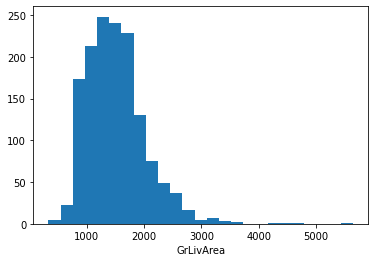

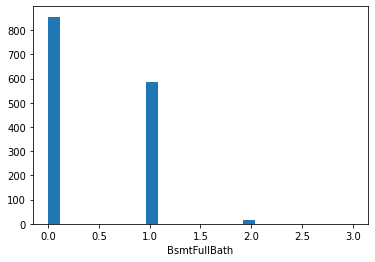

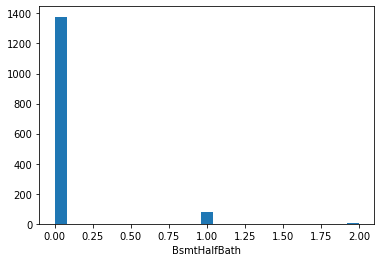

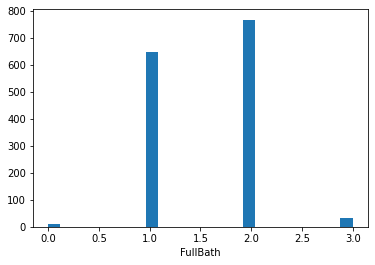

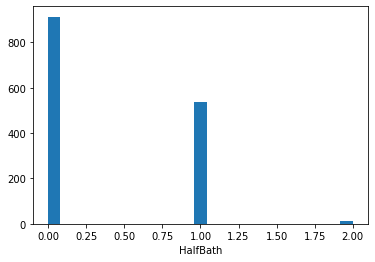

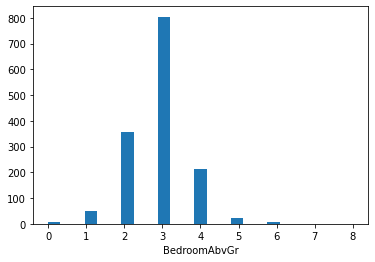

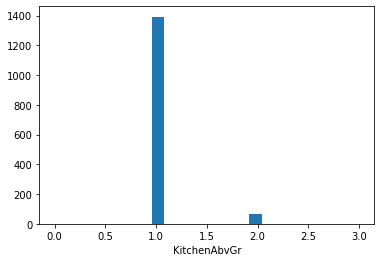

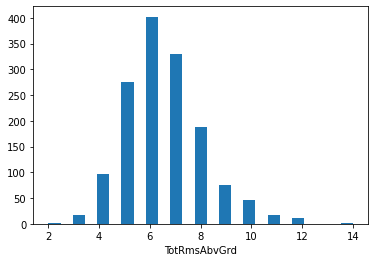

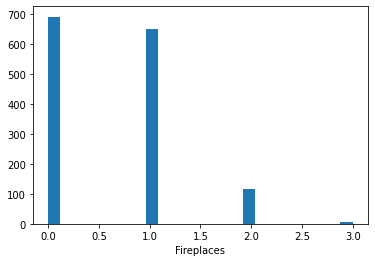

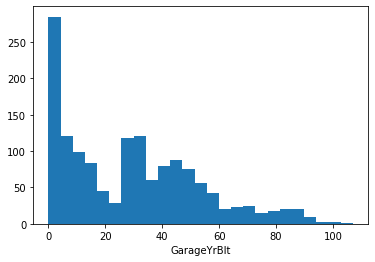

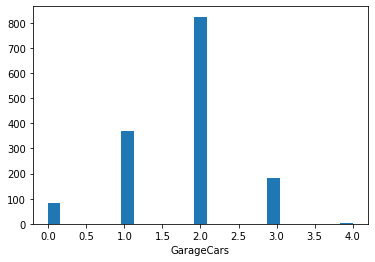

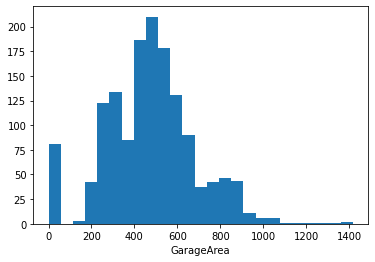

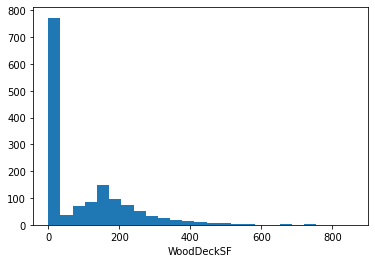

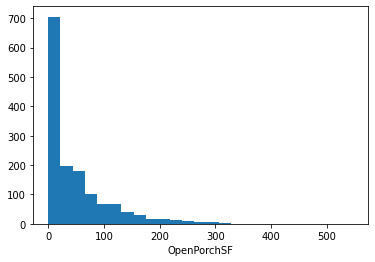

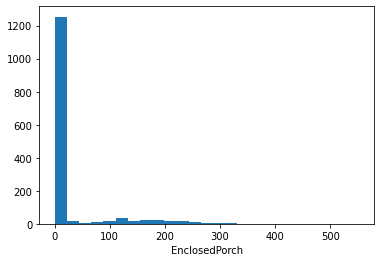

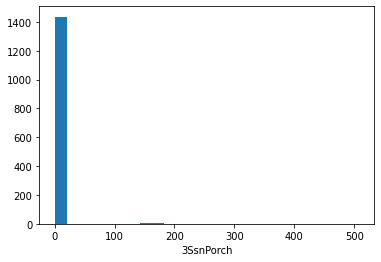

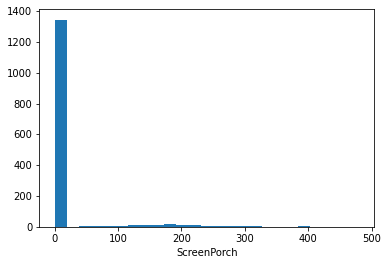

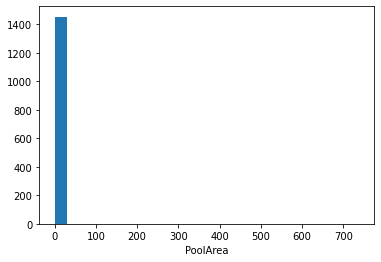

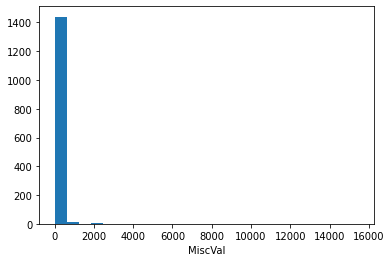

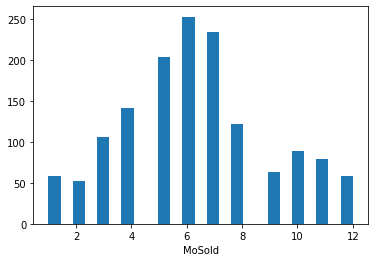

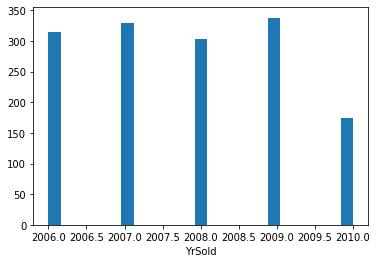

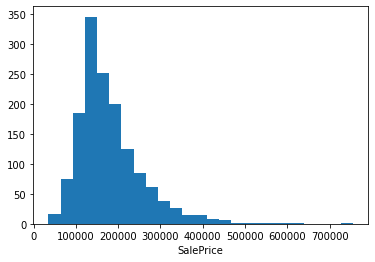

In [361]:
for feature in numerical_feature:
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.show()

Data is schewed, so we will perform logrithmic distribution

In [362]:
log_feature=['LotFrontage','LotArea','SalePrice','1stFlrSF','GrLivArea']# Considering feature who has non zero values, as zero is invaid in log
for feature in log_feature:
        df[feature]=np.log(df[feature])
    

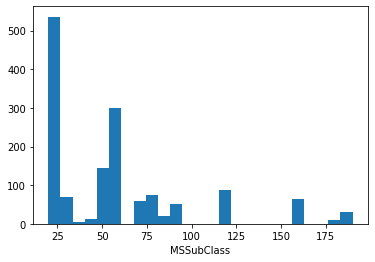

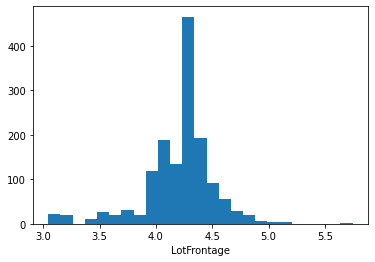

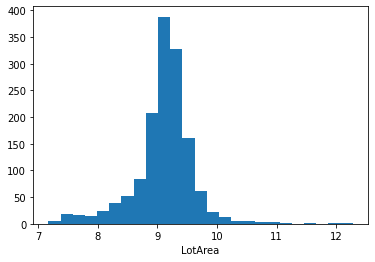

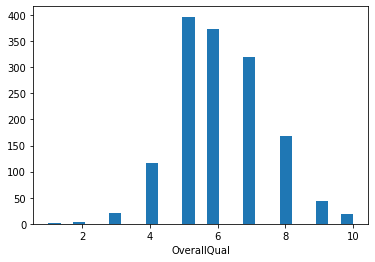

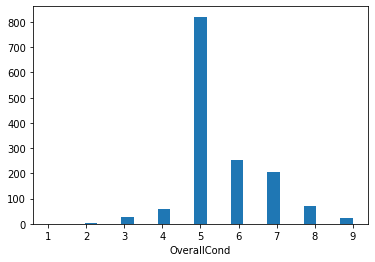

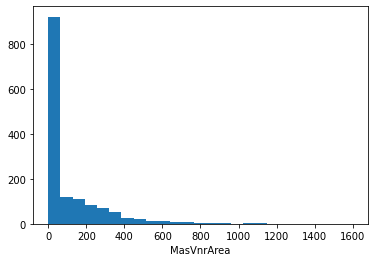

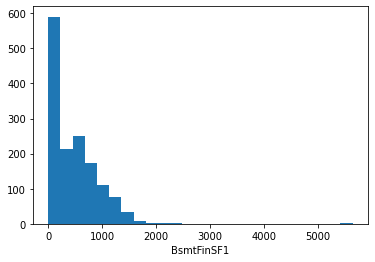

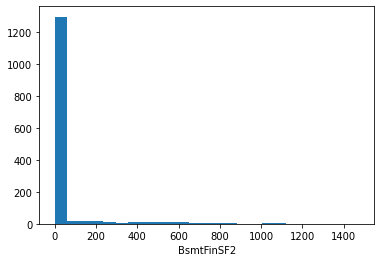

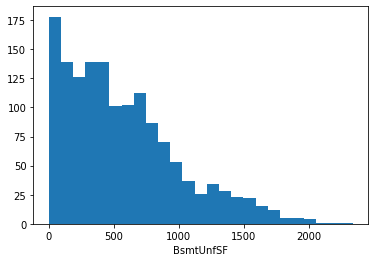

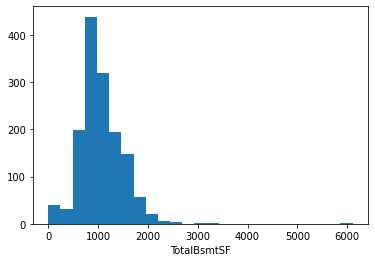

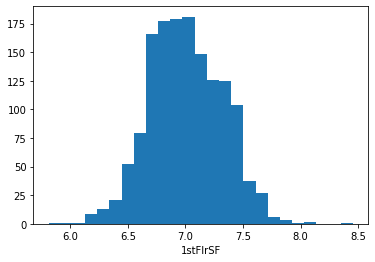

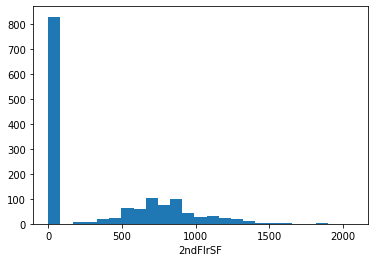

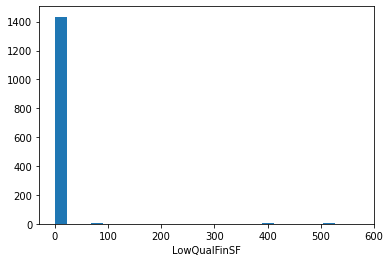

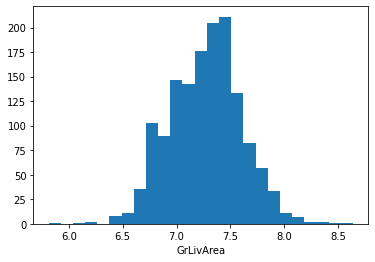

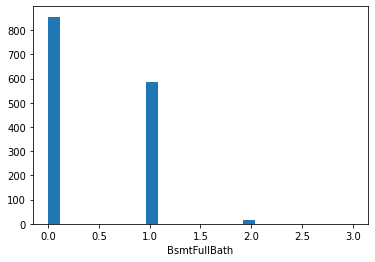

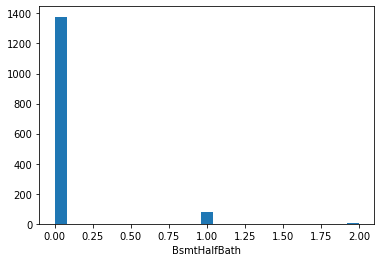

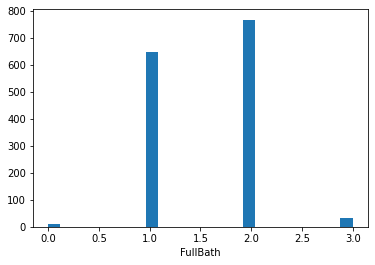

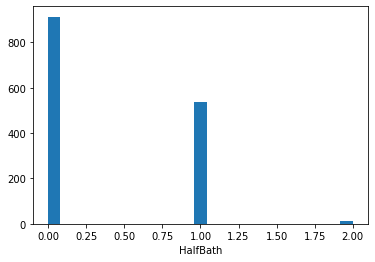

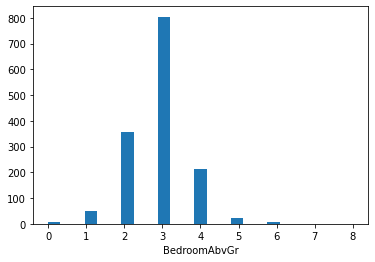

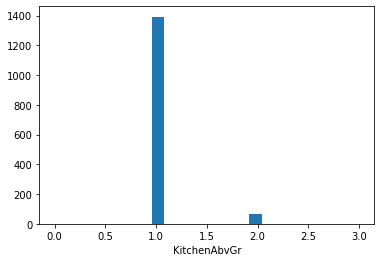

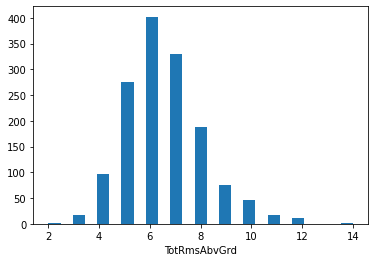

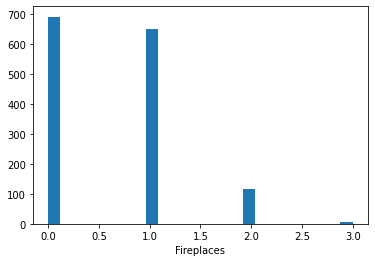

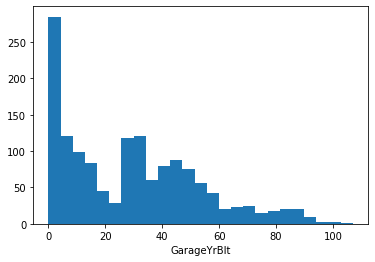

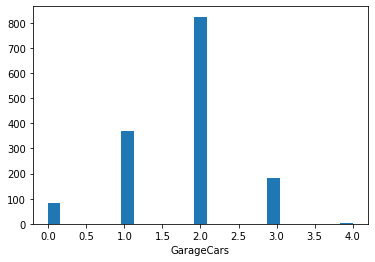

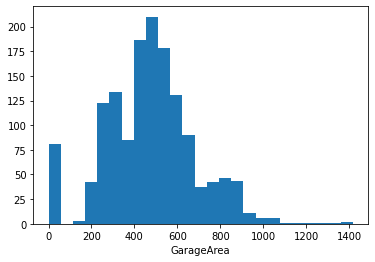

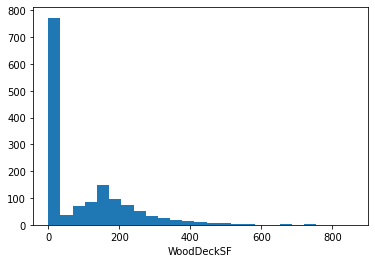

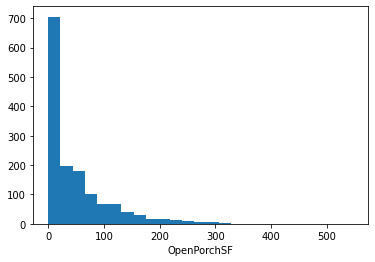

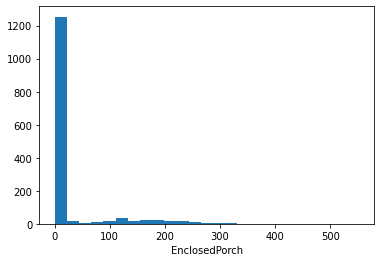

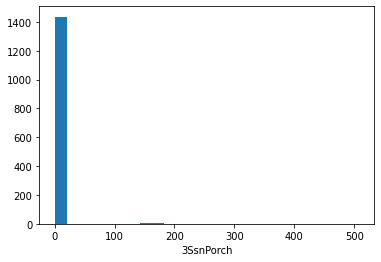

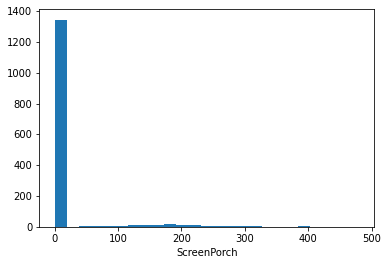

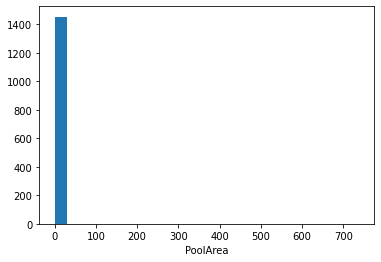

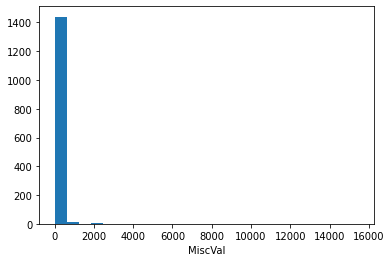

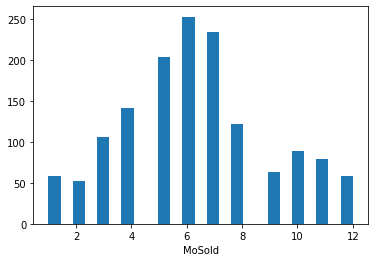

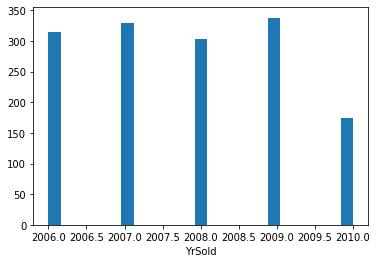

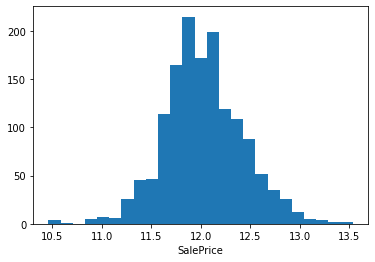

In [363]:
for feature in numerical_feature:
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.show()

In [364]:
df[numerical_feature].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,4.174387,9.041922,7,5,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,20,4.382027,9.169518,6,8,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,60,4.219508,9.328123,7,5,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,70,4.094345,9.164296,7,5,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,11.849398
4,60,4.430817,9.565214,8,5,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [68]:
# Here we will see the number of subcategory of catogirical feature who contirbute less than 0.01 % in that feature

In [365]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [366]:
for feature in categorical_feature:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_fe=temp[temp>0.01].index
    df[feature]= np.where(df[feature].isin(temp_fe),df[feature],'rare_var')

In [367]:
df.head(90)
# Values which contribute less than 0.001% in that feature, so we marked them as rare_var

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,60,RL,4.795791,9.684025,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2006,WD,Normal,12.468437,0,0,0
86,87,60,RL,4.804021,9.385218,Pave,Missing,IR2,Lvl,AllPub,...,Missing,0,3,2009,WD,Normal,12.066811,0,0,0
87,88,160,FV,3.688879,8.281724,Pave,Pave,Reg,Lvl,AllPub,...,Missing,0,6,2009,New,Partial,12.010666,0,0,0
88,89,50,rare_var,4.653960,9.044286,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,10,2009,rare_var,Abnorml,11.350407,0,0,1


# Feature Scaling

In [368]:
# Now We are going to perform scaling on Numberical Feature
df.shape

(1460, 84)

We ahve to perform OneHotEncoding or Pandas Dummy variable to convert Categorical Feature into numberical

In [369]:
from sklearn.preprocessing import LabelEncoder
for label in categorical_feature:
    le = LabelEncoder()   
    df[label]= le.fit_transform(df[label])

In [370]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,2,4.174387,9.041922,0,1,2,3,0,...,0,0,2,2008,2,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,2,3,0,...,0,0,5,2007,2,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,...,0,0,9,2008,2,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,...,0,0,2,2006,2,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,...,0,0,12,2008,2,2,12.429216,0,0,0


In [371]:
scale_feature=[feature for feature in df.columns if feature not in ['SalePrice','Id']]

In [372]:
len(scale_feature)

82

In [373]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [374]:
sc.fit(df[scale_feature])

MinMaxScaler()

In [375]:
scale_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [376]:
sc.transform(df[scale_feature])

array([[0.23529412, 0.5       , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.5       , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [377]:
X_train=pd.concat([df[['SalePrice','Id']].reset_index(drop=True),
                pd.DataFrame(sc.transform(df[scale_feature]),columns=scale_feature)],axis=1)

In [378]:
X_train.head()

,SalePrice,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,12.247694,1,0.235294,0.5,0.418208,0.366344,0.0,0.5,0.666667,1.0,...,0.5,0.0,0.0,0.090909,0.50,0.666667,0.5,0.0,0.0,0.0
1,12.109011,2,0.000000,0.5,0.495064,0.391317,0.0,0.5,0.666667,1.0,...,0.5,0.0,0.0,0.363636,0.25,0.666667,0.5,0.0,0.0,0.0
2,12.317167,3,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.000000,1.0,...,0.5,0.0,0.0,0.727273,0.50,0.666667,0.5,0.0,0.0,0.0
3,11.849398,4,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.000000,1.0,...,0.5,0.0,0.0,0.090909,0.00,0.666667,0.0,0.0,0.0,0.0
4,12.429216,5,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.000000,1.0,...,0.5,0.0,0.0,1.000000,0.50,0.666667,0.5,0.0,0.0,0.0


# Feature Selection

In [380]:
# Importance Of Features
from sklearn.ensemble import ExtraTreesRegressor
imp=ExtraTreesRegressor()
imp.fit(X_train.drop('SalePrice',axis=1),X_train['SalePrice'])

ExtraTreesRegressor()

In [381]:
imp.feature_importances_

array([2.11245521e-03, 3.39268966e-03, 1.12434878e-02, 3.52062734e-03,
       9.27765692e-03, 3.28989771e-04, 1.54875633e-03, 2.41588573e-03,
       2.76179488e-03, 6.32896483e-06, 1.65336289e-03, 1.90079673e-03,
       4.81927773e-03, 1.68168708e-03, 3.22221261e-04, 2.87883365e-03,
       1.96344445e-03, 2.31686925e-01, 6.31888176e-03, 3.83919380e-02,
       1.16343912e-02, 2.24334735e-03, 5.88528587e-04, 2.43390730e-03,
       1.83341334e-03, 1.46511114e-03, 2.09085147e-03, 1.20216616e-01,
       2.94081121e-03, 1.94567305e-03, 1.61469981e-02, 1.65839550e-03,
       2.68676956e-03, 3.74513294e-03, 1.04999041e-02, 1.04518769e-03,
       1.24302395e-03, 2.49479384e-03, 1.64523774e-02, 4.71130658e-04,
       2.40160380e-03, 3.04985897e-02, 9.89086194e-04, 1.83217294e-02,
       8.56982407e-03, 4.07497484e-04, 7.11779026e-02, 5.85658346e-03,
       1.03455962e-03, 6.41520904e-02, 4.33553112e-03, 9.57782576e-03,
       2.65322453e-03, 2.88439707e-02, 6.48557560e-03, 2.11593313e-03,
      

In [382]:
X_train.shape,imp_feature.shape

((1460, 84), (83,))

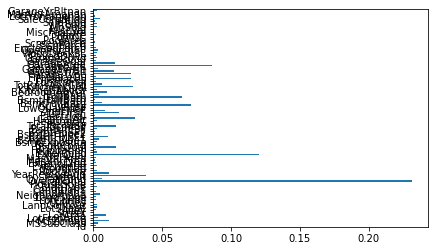

In [383]:
#Graphical Representation
imp_feature=pd.Series(imp.feature_importances_,index=X_train.drop('SalePrice',axis=1).columns)
imp_feature.plot(kind='barh')
plt.show()
# Seems it is not the best way to get the importance of features, as there are a lot of feature is present

In [384]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [385]:
select_feature=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [386]:
select_feature.fit(X_train.drop('SalePrice',axis=1),X_train['SalePrice'])

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [387]:
select_feature.get_support()

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [388]:
y_train=X_train['SalePrice']
X_train.drop('SalePrice',axis=1,inplace=True)

In [389]:
selected_feature=X_train.columns[select_feature.get_support()]
len(selected_feature)

21

In [390]:
print(f'{len(X_train.columns)} are total Feature')
print(f'{len(selected_feature)} are selected')
print(f'{len(X_train.columns) - len(selected_feature)} are rejected, There cofficient shrinked to Zero while penalizin with lasso Regression')

83 are total Feature
21 are selected
62 are rejected, There cofficient shrinked to Zero while penalizin with lasso Regression


In [391]:
selected_feature

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive'],
      dtype='object')

In [424]:
X_train=X_train[selected_feature]
X_train.shape

(1460, 21)

In [425]:
# Here we did feature scaling with MinMaxScaler,we can also use standardScaler, there is no particular reason for using minmaxScaler
# we can use both
X_train.to_csv('X_train.csv',index=False)
#Export This to CSV file

We have performed both feature engineering & Feature selection on Training dataset, same we have to perform for Testing dataset, here both dataset are indivitual seperated by kaggle so we are doing it, otherwise after performing feature engineering & feature selection we will directly use train_test_split


In [392]:
# For Testing Data

In [393]:
X_test=pd.read_csv('House_Price_test.csv')
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [394]:
X_test.shape

(1459, 80)

In [395]:
#Feature Engineering
X_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [396]:
#Categorical Featuers
categorical_feature=[feature for feature in X_test.columns if X_test[feature].dtype =='O']
for feature in categorical_feature:
    print(f'{feature} has {np.round(X_test[feature].isnull().mean(),4)} % is missing')

MSZoning has 0.0027 % is missing
Street has 0.0 % is missing
Alley has 0.9267 % is missing
LotShape has 0.0 % is missing
LandContour has 0.0 % is missing
Utilities has 0.0014 % is missing
LotConfig has 0.0 % is missing
LandSlope has 0.0 % is missing
Neighborhood has 0.0 % is missing
Condition1 has 0.0 % is missing
Condition2 has 0.0 % is missing
BldgType has 0.0 % is missing
HouseStyle has 0.0 % is missing
RoofStyle has 0.0 % is missing
RoofMatl has 0.0 % is missing
Exterior1st has 0.0007 % is missing
Exterior2nd has 0.0007 % is missing
MasVnrType has 0.011 % is missing
ExterQual has 0.0 % is missing
ExterCond has 0.0 % is missing
Foundation has 0.0 % is missing
BsmtQual has 0.0302 % is missing
BsmtCond has 0.0308 % is missing
BsmtExposure has 0.0302 % is missing
BsmtFinType1 has 0.0288 % is missing
BsmtFinType2 has 0.0288 % is missing
Heating has 0.0 % is missing
HeatingQC has 0.0 % is missing
CentralAir has 0.0 % is missing
Electrical has 0.0 % is missing
KitchenQual has 0.0007 % is 

In [397]:
for feature in categorical_feature:
    X_test[feature].fillna('Missing',inplace=True)
X_test[categorical_feature].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [398]:
X_test[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Missing,Missing,Gar2,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [399]:
X_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [400]:
# Numerical Features
nan_numerical_feature=[feature for feature in X_test.columns if X_test[feature].dtype != 'O' and X_test[feature].isnull().sum()>0 and 'Yr' not in feature and 'Year' not in feature]
nan_numerical_feature

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [401]:
for feature in nan_numerical_feature:
    X_test[feature+'nan']=np.where(X_test[feature].isnull(),1,0)
    X_test[feature].fillna(X_test[feature].median(),inplace=True)

In [402]:
X_test[nan_numerical_feature].isnull().sum()
# Now no missing /nan values is present

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
dtype: int64

In [403]:
yr_feature=[feature for feature in X_test.columns if 'Yr' in feature or 'Year' in feature]
yr_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [404]:
for feature in yr_feature:
    if feature !='YrSold':
        X_test[feature]=X_test['YrSold']-X_test[feature]

In [405]:
X_test[yr_feature]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010
...,...,...,...,...
1454,36,36,NaN,2006
1455,36,36,36.0,2006
1456,46,10,46.0,2006
1457,14,14,NaN,2006


In [406]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [407]:
# Log normal distribution on same feature as we did with training data
log_feature=['LotFrontage','LotArea','1stFlrSF','GrLivArea']# Considering feature who has non zero values, as zero is invaid in log
for feature in log_feature:
        X_test[feature]=np.log(X_test[feature])
    

In [408]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [409]:
from sklearn.preprocessing import LabelEncoder
for label in categorical_feature:
    le = LabelEncoder()   
    X_test[label]= le.fit_transform(X_test[label])

In [410]:
X_test[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,1,...,1,3,4,5,2,2,3,1,9,4
1,4,1,1,0,3,0,0,0,12,2,...,1,3,4,5,2,2,2,0,9,4
2,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,3,1,9,4
3,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,2,1,9,4
4,4,1,1,0,1,0,4,0,22,2,...,1,2,4,5,2,2,2,1,9,4


In [411]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageCarsnan,GarageAreanan
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [412]:
#Feature scalling
scale_feature=[feature for feature in X_test.columns if feature not in ['SalePrice','Id']]
sc.fit(X_test[scale_feature])

MinMaxScaler()

In [414]:
X_test=pd.concat([X_test[['Id']].reset_index(drop=True),
                pd.DataFrame(sc.transform(X_test[scale_feature]),columns=scale_feature)],axis=1)

In [415]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageCarsnan,GarageAreanan
0,1461,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [428]:
X_train.shape,X_test.shape

((1460, 21), (1459, 21))

In [429]:
X_test.head()

,MSZoning,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,0.6,1.0,0.0,0.444444,0.384615,0.822581,1.000000,1.0,1.0,0.833333,...,1.0,0.312253,0.312253,0.0,1.0,0.00,0.166667,1.000000,0.2,1.0
1,0.8,0.0,0.0,0.555556,0.407692,0.870968,1.000000,1.0,1.0,0.000000,...,1.0,0.468253,0.468253,0.0,0.5,0.00,0.166667,1.000000,0.2,1.0
2,0.8,0.0,0.0,0.444444,0.107692,0.225806,1.000000,0.5,1.0,0.333333,...,1.0,0.326139,0.548792,0.0,1.0,0.25,0.166667,0.000000,0.4,1.0
3,0.8,0.0,0.0,0.555556,0.100000,0.225806,1.000000,1.0,1.0,0.333333,...,1.0,0.325285,0.542672,0.0,0.5,0.25,0.166667,0.000000,0.4,1.0
4,0.8,0.0,1.0,0.777778,0.146154,0.322581,0.666667,0.5,1.0,0.000000,...,1.0,0.453388,0.453388,0.0,0.5,0.00,0.166667,0.666667,0.4,1.0


In [430]:
X_test=X_test[selected_feature]
X_test.shape

(1459, 21)

In [433]:
# Here we did feature scaling with MinMaxScaler,we can also use standardScaler, there is no particular reason for using minmaxScaler
# we can use both
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
#Export This to CSV file

In [451]:
X_train.shape,X_test.shape,y_train.shape

((1460, 21), (1459, 21), (1460,))

In [452]:
# ------------------End Feature Engineering & Feature Selection for both Testing and trainging Data----------------